In [35]:
library(MASS)


Attaching package: ‘MASS’

The following object is masked _by_ ‘.GlobalEnv’:

    leuk



## Problem Sheet 2

Two Questions: **Both Binomial**

## Q1) Looking at proportional death rates

### Constructing dataframe

In [24]:
doses <- c(0,1,10,50,100,200)

In [25]:
leuk <- c(13,5,5,3,4,18)
other <- c(378,200,151,47,31,33)

In [26]:
tot = leuk + other

In [27]:
leuk.prop <- leuk / tot

In [28]:
hiroshima <- data.frame(leuk.prop,doses,tot)

In [29]:
hiroshima

leuk.prop,doses,tot
0.03324808,0,391
0.02439024,1,205
0.03205128,10,156
0.06000000,50,50
0.11428571,100,35
0.35294118,200,51


## Fitting the logistic regression GLM

Fitting a GLM with:

* Binomial underlying distribution for the random variable for Leukemia proportion
* Logit link function mapping the fitted values to the linear predictor
* Weights provided by the total numbers of cancers

### Model

General model:

**The reason you're tearing your hair out about this having an extra parameter is because it's fundamentally over-parameterised!**

**You should have p-parameters, but actually you've got p+1 here with one categorical factor in the equation.**

**Apply the corner constraint when fitting the model:**

> $E[Y_{i}] = \mu_{i} = g^{-1}(\eta_{i}) = g^{-1} \left ( \beta_{0} + \beta_{1}x_{i1} + \beta_{2}x_{i2} + ... + \beta_{p}x_{ip} \right )$,

where $i = 1,2,...,n$ and $j = 1,2,...,p$. Have $n$ observations and $p$ parameters that you're fitting to the model.

With logistic regression using the binomial distribution  and it's canonical link function - the  logit link - $g()$ looks like this:

> $b(\theta_{i}) = (1 + e^{\theta_{i}})$

> $\mu_{i} = \pi_{i} = b'(\theta_{i}) = \dfrac{e^{\theta_{i}}}{1+e^{\theta_{i}}}$

And now you rearrange to put the canonical parameter as the subject as a function of the mean, and that function **is** the link function.

> $\pi_{i}(1+e^{\theta_{i}}) = e^{\theta_{i}}$

> $\pi_{i} = e^{\theta_{i}} - \pi_{i}e^{\theta_{i}} = e^{\theta_{i}}(1 -\pi_{i})$

> $e^{\theta_{i}} = \dfrac{\pi_{i}}{(1 -\pi_{i})}$

> $\theta_{i} = \ln\dfrac{\pi_{i}}{(1 -\pi_{i})}$

> $g(\mu_{i}) = g(\pi_{i}) = \ln\dfrac{\pi_{i}}{(1 -\pi_{i})}$

since $\theta_{i} = \eta_{i}$ for the canonical link, and therefore the above is the logit link.

Since doses is a factor, we have $m=6$ factors and will therefore have $m-1=5$ dummy variables for these factors, with the first factor for the 0th deaths group set to zero.

> $\eta = \beta_{0} + \beta_{2}x_{i2} + ... + \beta_{p}x_{ip}$

with $\beta_{1}$ = 0, and hence you're fitting a model with $p$ parameters, and all of your $n-p$ logic works out fine.

In [30]:
leuk.glm <- glm(leuk.prop ~ doses, family=binomial(link='logit'), weights = tot, data=hiroshima)

summary(leuk.glm)


Call:
glm(formula = leuk.prop ~ doses, family = binomial(link = "logit"), 
    data = hiroshima, weights = tot)

Deviance Residuals: 
       1         2         3         4         5         6  
 0.41428  -0.48994  -0.13991   0.02835   0.00048   0.00269  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.488973   0.204062 -17.098  < 2e-16 ***
doses        0.014410   0.001817   7.932 2.15e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 54.35089  on 5  degrees of freedom
Residual deviance:  0.43206  on 4  degrees of freedom
AIC: 26.097

Number of Fisher Scoring iterations: 4


**Binomial is a one parameter model, therefore has scale parameter, $\phi = 1$, and this the scaled deviance is equal  to the measured deviance.**

### Problem!

You have just fitted the saturated model, because you set doses to be a factor rather than a quantitative variable. Our scaled deviance became 0; there's no difference between this model and the saturated model with $n$ parameters.

### Fixing this... Setting *doses* to be a continuous explanatory variable, and so our model becomes:

> $\eta = \beta_{0} + \beta_{1}x_{i1}$

> $\eta = -3.488973 + 0.014410 \times \text{doses}$


## Analysis of Deviance

Have (scaled) deviance of $0.43206$ on $n-p=6-2=4$ degrees of freedom.

We can reject the null hypothesis (that our model does not need any additional parameters that exist in the saturated model  that don't  exist in the current model) at the $100\alpha\%$ level of significance if:

> $S > \chi^{2}_{4}(\alpha)$

In [31]:
pchisq(0.43206, 4, lower.tail = F)

[1] 0.9797689

We don't have sufficient  evidence to reject the null hypothesis, therefore our goodness of fit statistic suggests we are not missing parameters. Since we are only fitting one explanatory variable and thus two parameters (the other being for the intercept), we can quickly compare the scaled deviance with the null deviance (the deviance achieved by purely fitting a model to the mean of the dependent variable), and you can clearly see that the null deviance is unsatasfactory. We therefore can say that this model passes the goodness of fit check, and we won't look at reducing the number of parameters for a more parsimoniuous model.

We then pass to the model adequecy stage...

In [33]:
x <- 1:200
pred <- predict(leuk.glm, data.frame(doses=x), type='response')

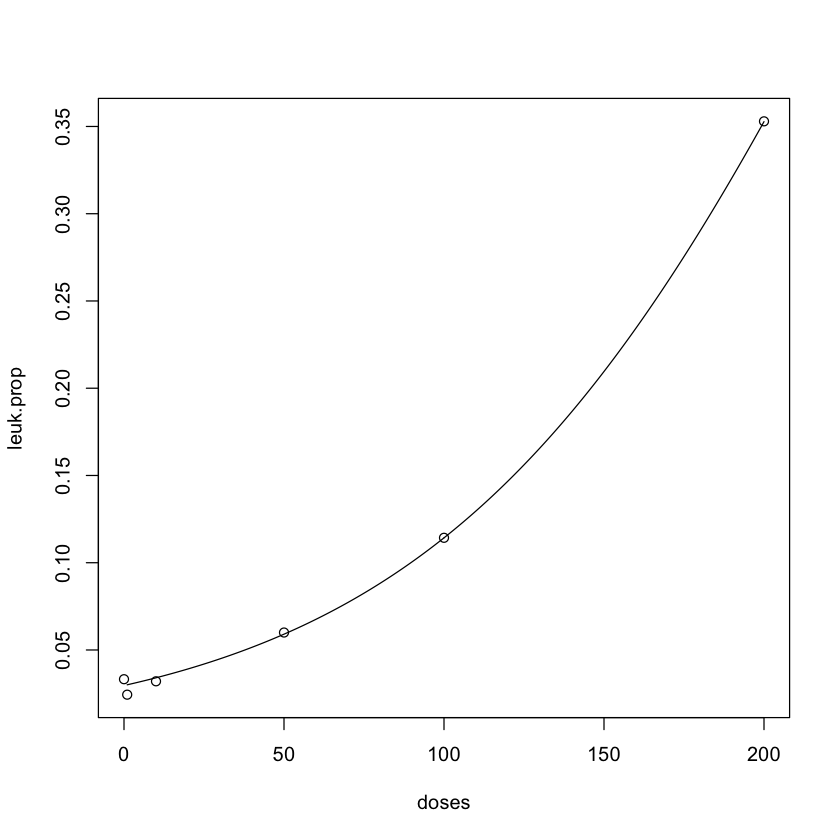

In [34]:
plot(doses,leuk.prop)
lines(x,pred)

* By initially looking at the prediction Vs the observed data, the fit looks sensible.

* Need to inspect the residuals.

In [37]:
leuk.stdres <- stdres(leuk.glm)
leuk.fitted <- fitted(leuk.glm)

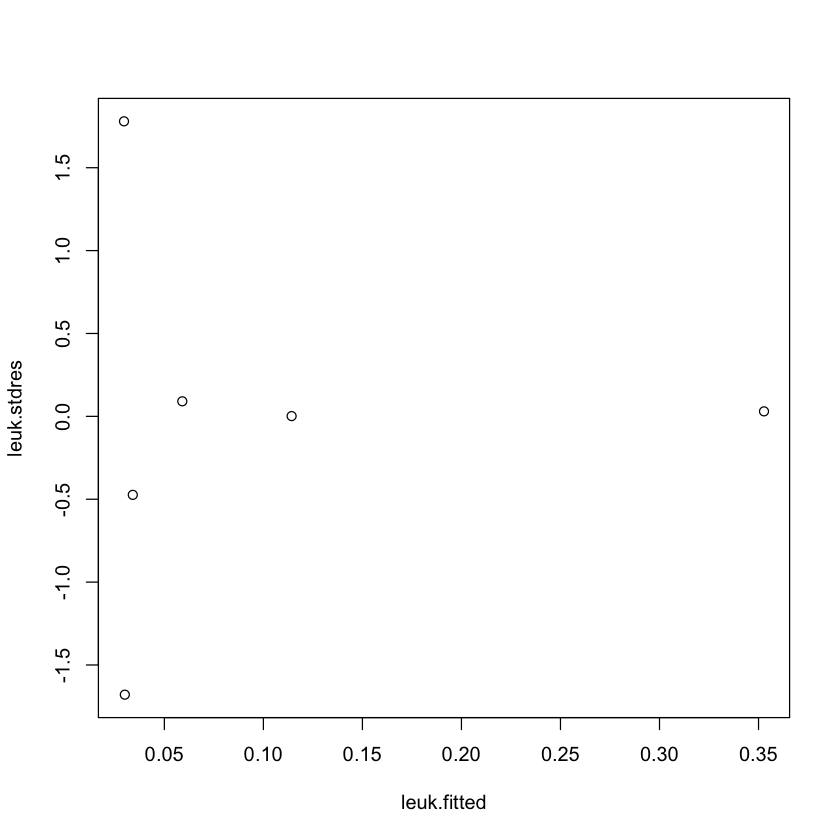

In [38]:
plot(leuk.fitted, leuk.stdres)

# Q2) Toxicity of tobacco budworm

> Have doses of something

> Batches of 20 moths of  each sex were exposes to the dose of something

> Recorded the number that died as a result of the dose

> Fit a logistic regresion to $\log_{2}(\text{dose})$

In [71]:
# data entry

deaths <- c(1,4,9,13,18,20,
            0,2,6,10,12,16)

tot <- rep(20,12)

deaths.prop <- deaths / tot

dose <- rep(c(1,2,4,8,16,32),2)

log.2.dose <- log(dose, 2)

sex <- factor(c(rep('M',6),rep('F',6)))

budworm <- data.frame(deaths.prop, tot, sex, log.2.dose)

In [72]:
budworm

deaths.prop,tot,sex,log.2.dose
0.05,20,M,0
0.20,20,M,1
0.45,20,M,2
0.65,20,M,3
0.90,20,M,4
1.00,20,M,5
0.00,20,F,0
0.10,20,F,1
0.30,20,F,2
0.50,20,F,3


## GLM

### Model without interaction (i.e. different intercept but same slope):

> $E[Y_{i}] = \mu_{i} = g^{-1}(\eta_{i}) = g^{-1} \left ( \beta_{0} + \beta_{1}x_{i, \log_{2}(\text{dose})} + \beta_{2}x_{i, F} + \beta_{3}x_{i, M} \right )$,

**where $i = 1,2,...,n$. This is an over-parameterised model, therefore we apply the corner constraint where $\beta_{2} = 0$. We therefore  fit a model  with $n = 12$ observations,  and $p=3$ parameters. Our deviance should come out with $n-p=12-3=9$ degrees of freedom.**

### Model with interaction (different intercept **AND** different slope):

> $E[Y_{i}] = \mu_{i} = g^{-1}(\eta_{i}) = g^{-1} \left ( \beta_{0} + \beta_{1}x_{i, \log_{2}(\text{dose})} + \beta_{2}x_{i, F} + \beta_{3}x_{i, M} + \beta_{4}x_{i, \log_{2}(\text{dose})F} + \beta_{5}x_{i, \log_{2}(\text{dose})M} \right )$.

**Corner constraint for interaction model: $\beta_{2} = \beta_{4} = 0$**.

### Log link

With logistic regression using the binomial distribution  and it's canonical link function - the  logit link - $g()$ looks like this:

> $b(\theta_{i}) = (1 + e^{\theta_{i}})$

> $\mu_{i} = \pi_{i} = b'(\theta_{i}) = \dfrac{e^{\theta_{i}}}{1+e^{\theta_{i}}}$

And now you rearrange to put the canonical parameter as the subject as a function of the mean, and that function **is** the link function.

> $\pi_{i}(1+e^{\theta_{i}}) = e^{\theta_{i}}$

> $\pi_{i} = e^{\theta_{i}} - \pi_{i}e^{\theta_{i}} = e^{\theta_{i}}(1 -\pi_{i})$

> $e^{\theta_{i}} = \dfrac{\pi_{i}}{(1 -\pi_{i})}$

> $\theta_{i} = \ln\dfrac{\pi_{i}}{(1 -\pi_{i})}$

> $g(\mu_{i}) = g(\pi_{i}) = \ln\dfrac{\pi_{i}}{(1 -\pi_{i})}$

since $\theta_{i} = \eta_{i}$ for the canonical link, and therefore the above is the logit link.

# No-interaction model

In [91]:
budworm.glm <- glm(deaths.prop ~ log.2.dose + sex, family=binomial(link='logit'), weights=tot, data=budworm)

summary(budworm.glm)


Call:
glm(formula = deaths.prop ~ log.2.dose + sex, family = binomial(link = "logit"), 
    data = budworm, weights = tot)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.10540  -0.65343  -0.02225   0.48471   1.42944  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -3.4732     0.4685  -7.413 1.23e-13 ***
log.2.dose    1.0642     0.1311   8.119 4.70e-16 ***
sexM          1.1007     0.3558   3.093  0.00198 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 124.8756  on 11  degrees of freedom
Residual deviance:   6.7571  on  9  degrees of freedom
AIC: 42.867

Number of Fisher Scoring iterations: 4


In [92]:
pchisq(6.7571, 9, lower.tail = F)

[1] 0.662392

## Analysis of Deviance Table

> Parameters added sequentially

The full model, with the dose and the gender factor have a $p$-value associated with the (scaled) deviance of $0.66$ and therefore not significant. We therefore don't have sufficient evidence to reject the null hypothesis that we do not need any additional parameters that exist in the saturated model, but do not exist in the current model.

Running the same test without the sex dummy variable, we see that the $p$-value is much lower, though not so significant that we would reject the null at the 5% level of significance.

We can however say that there is more weight to our evidence that we don't need additional parameters in our model when we include the gender factor. Therefore I would endorse the model with the gender factor rather than without it.

In [84]:
pchisq(16.984033, 10, lower.tail=F)

[1] 0.07471804

In [85]:
anova(budworm.glm, test='Chisq')

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,11,124.875593,NA
log.2.dose,1,107.89156,10,16.984033,2.838937e-25
sex,1,10.22697,9,6.757064,1.384020e-03


**We can specifically test for the significance of the gender factor**

> $W = S_{r} - S{f} = \dfrac{D_{r} - D_{f}}{\phi} = D_{r} - D_{f} \sim {\chi^{2}_{q-p}}$

Therefore the difference in the number of parameters is clearly 1, and the difference in the deviance between the two models is 10.22697.

This is a hypothesis test that:

> $H_{0}: \beta_{p+1} = ... = \beta_{q} = 0$

Which in our case is just the additional parameter for gender. We can reject thus null hypothesis at the 2% level of significance, and therefore accept the alternative, that the gender factor is significant.

In [86]:
pchisq(10.22697, 1, lower.tail=F)

[1] 0.001384018

# Interaction Model

> Passes the goodness of fit test but interaction term not significant, so will re-run without it

> Intuition is that there's no need for a different slope.

In [90]:
budworm.glm.int <- glm(deaths.prop ~ log.2.dose*sex, family=binomial(link='logit'), weights=tot, data=budworm)

summary(budworm.glm.int)


Call:
glm(formula = deaths.prop ~ log.2.dose * sex, family = binomial(link = "logit"), 
    data = budworm, weights = tot)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.39849  -0.32094  -0.07592   0.38220   1.10375  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -2.9935     0.5527  -5.416 6.09e-08 ***
log.2.dose        0.9060     0.1671   5.422 5.89e-08 ***
sexM              0.1750     0.7783   0.225    0.822    
log.2.dose:sexM   0.3529     0.2700   1.307    0.191    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 124.8756  on 11  degrees of freedom
Residual deviance:   4.9937  on  8  degrees of freedom
AIC: 43.104

Number of Fisher Scoring iterations: 4


In [88]:
pchisq(4.9937,8,lower.tail=F)

[1] 0.7582493

# Taking the results of the non-interaction model and plotting two different slopes.

In [94]:
summary(budworm.glm)


Call:
glm(formula = deaths.prop ~ log.2.dose + sex, family = binomial(link = "logit"), 
    data = budworm, weights = tot)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.10540  -0.65343  -0.02225   0.48471   1.42944  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -3.4732     0.4685  -7.413 1.23e-13 ***
log.2.dose    1.0642     0.1311   8.119 4.70e-16 ***
sexM          1.1007     0.3558   3.093  0.00198 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 124.8756  on 11  degrees of freedom
Residual deviance:   6.7571  on  9  degrees of freedom
AIC: 42.867

Number of Fisher Scoring iterations: 4


**Two different intercepts:**

Female:

> $\hat{\eta}_{i} = -3.4732 + 1.0642 \times \log_{2}(\text{dose})$

Male:

> $\hat{\eta}_{i} = -2.3725 + 1.0642 \times \log_{2}(\text{dose})$

### Fitted models

> $\hat{\mu} = g^{-1}(\hat{\eta_{i}}) = \dfrac{e^{\hat{\eta_{i}}}}{1 + e^{\hat{\eta_{i}}}}$

In [96]:
coef(budworm.glm)

(Intercept)  log.2.dose        sexM 
  -3.473155    1.064214    1.100743